<a href="https://colab.research.google.com/github/pAbhit007/ML_Heart_Disease_Prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [69]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [70]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [71]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [73]:
df.shape

(319795, 18)

In [74]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [75]:
df.select_dtypes(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


In [76]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [77]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BMI             319795 non-null  float64
 1   PhysicalHealth  319795 non-null  float64
 2   MentalHealth    319795 non-null  float64
 3   SleepTime       319795 non-null  float64
dtypes: float64(4)
memory usage: 9.8 MB


In [78]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   AgeCategory       319795 non-null  object
 7   Race              319795 non-null  object
 8   Diabetic          319795 non-null  object
 9   PhysicalActivity  319795 non-null  object
 10  GenHealth         319795 non-null  object
 11  Asthma            319795 non-null  object
 12  KidneyDisease     319795 non-null  object
 13  SkinCancer        319795 non-null  object
dtypes: object(14)
memory usage: 34.2+ MB


In [79]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [80]:
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BMI                               319795 non-null  float64
 1   PhysicalHealth                    319795 non-null  float64
 2   MentalHealth                      319795 non-null  float64
 3   SleepTime                         319795 non-null  float64
 4   HeartDisease_Yes                  319795 non-null  uint8  
 5   Smoking_Yes                       319795 non-null  uint8  
 6   AlcoholDrinking_Yes               319795 non-null  uint8  
 7   Stroke_Yes                        319795 non-null  uint8  
 8   DiffWalking_Yes                   319795 non-null  uint8  
 9   Sex_Male                          319795 non-null  uint8  
 10  AgeCategory_25-29                 319795 non-null  uint8  
 11  AgeCategory_30-34                 319795 non-null  u

In [82]:
import matplotlib.pyplot as plt

[Text(0, 0, '1.0'),
 Text(1, 0, '2.0'),
 Text(2, 0, '3.0'),
 Text(3, 0, '4.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '6.0'),
 Text(6, 0, '7.0'),
 Text(7, 0, '8.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '10.0'),
 Text(10, 0, '11.0'),
 Text(11, 0, '12.0'),
 Text(12, 0, '13.0'),
 Text(13, 0, '14.0'),
 Text(14, 0, '15.0'),
 Text(15, 0, '16.0'),
 Text(16, 0, '17.0'),
 Text(17, 0, '18.0'),
 Text(18, 0, '19.0'),
 Text(19, 0, '20.0'),
 Text(20, 0, '21.0'),
 Text(21, 0, '22.0'),
 Text(22, 0, '23.0'),
 Text(23, 0, '24.0')]

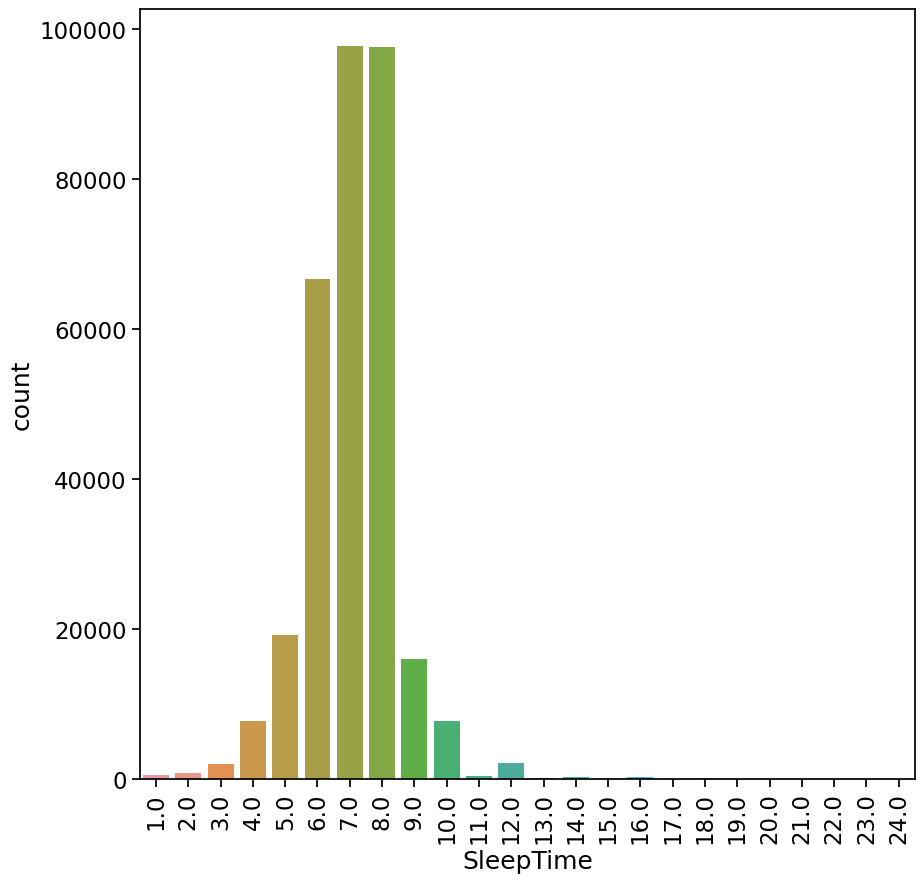

In [83]:
plt.figure(figsize=(10,10))
chart = sns.countplot(data=final_df,x= 'SleepTime')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

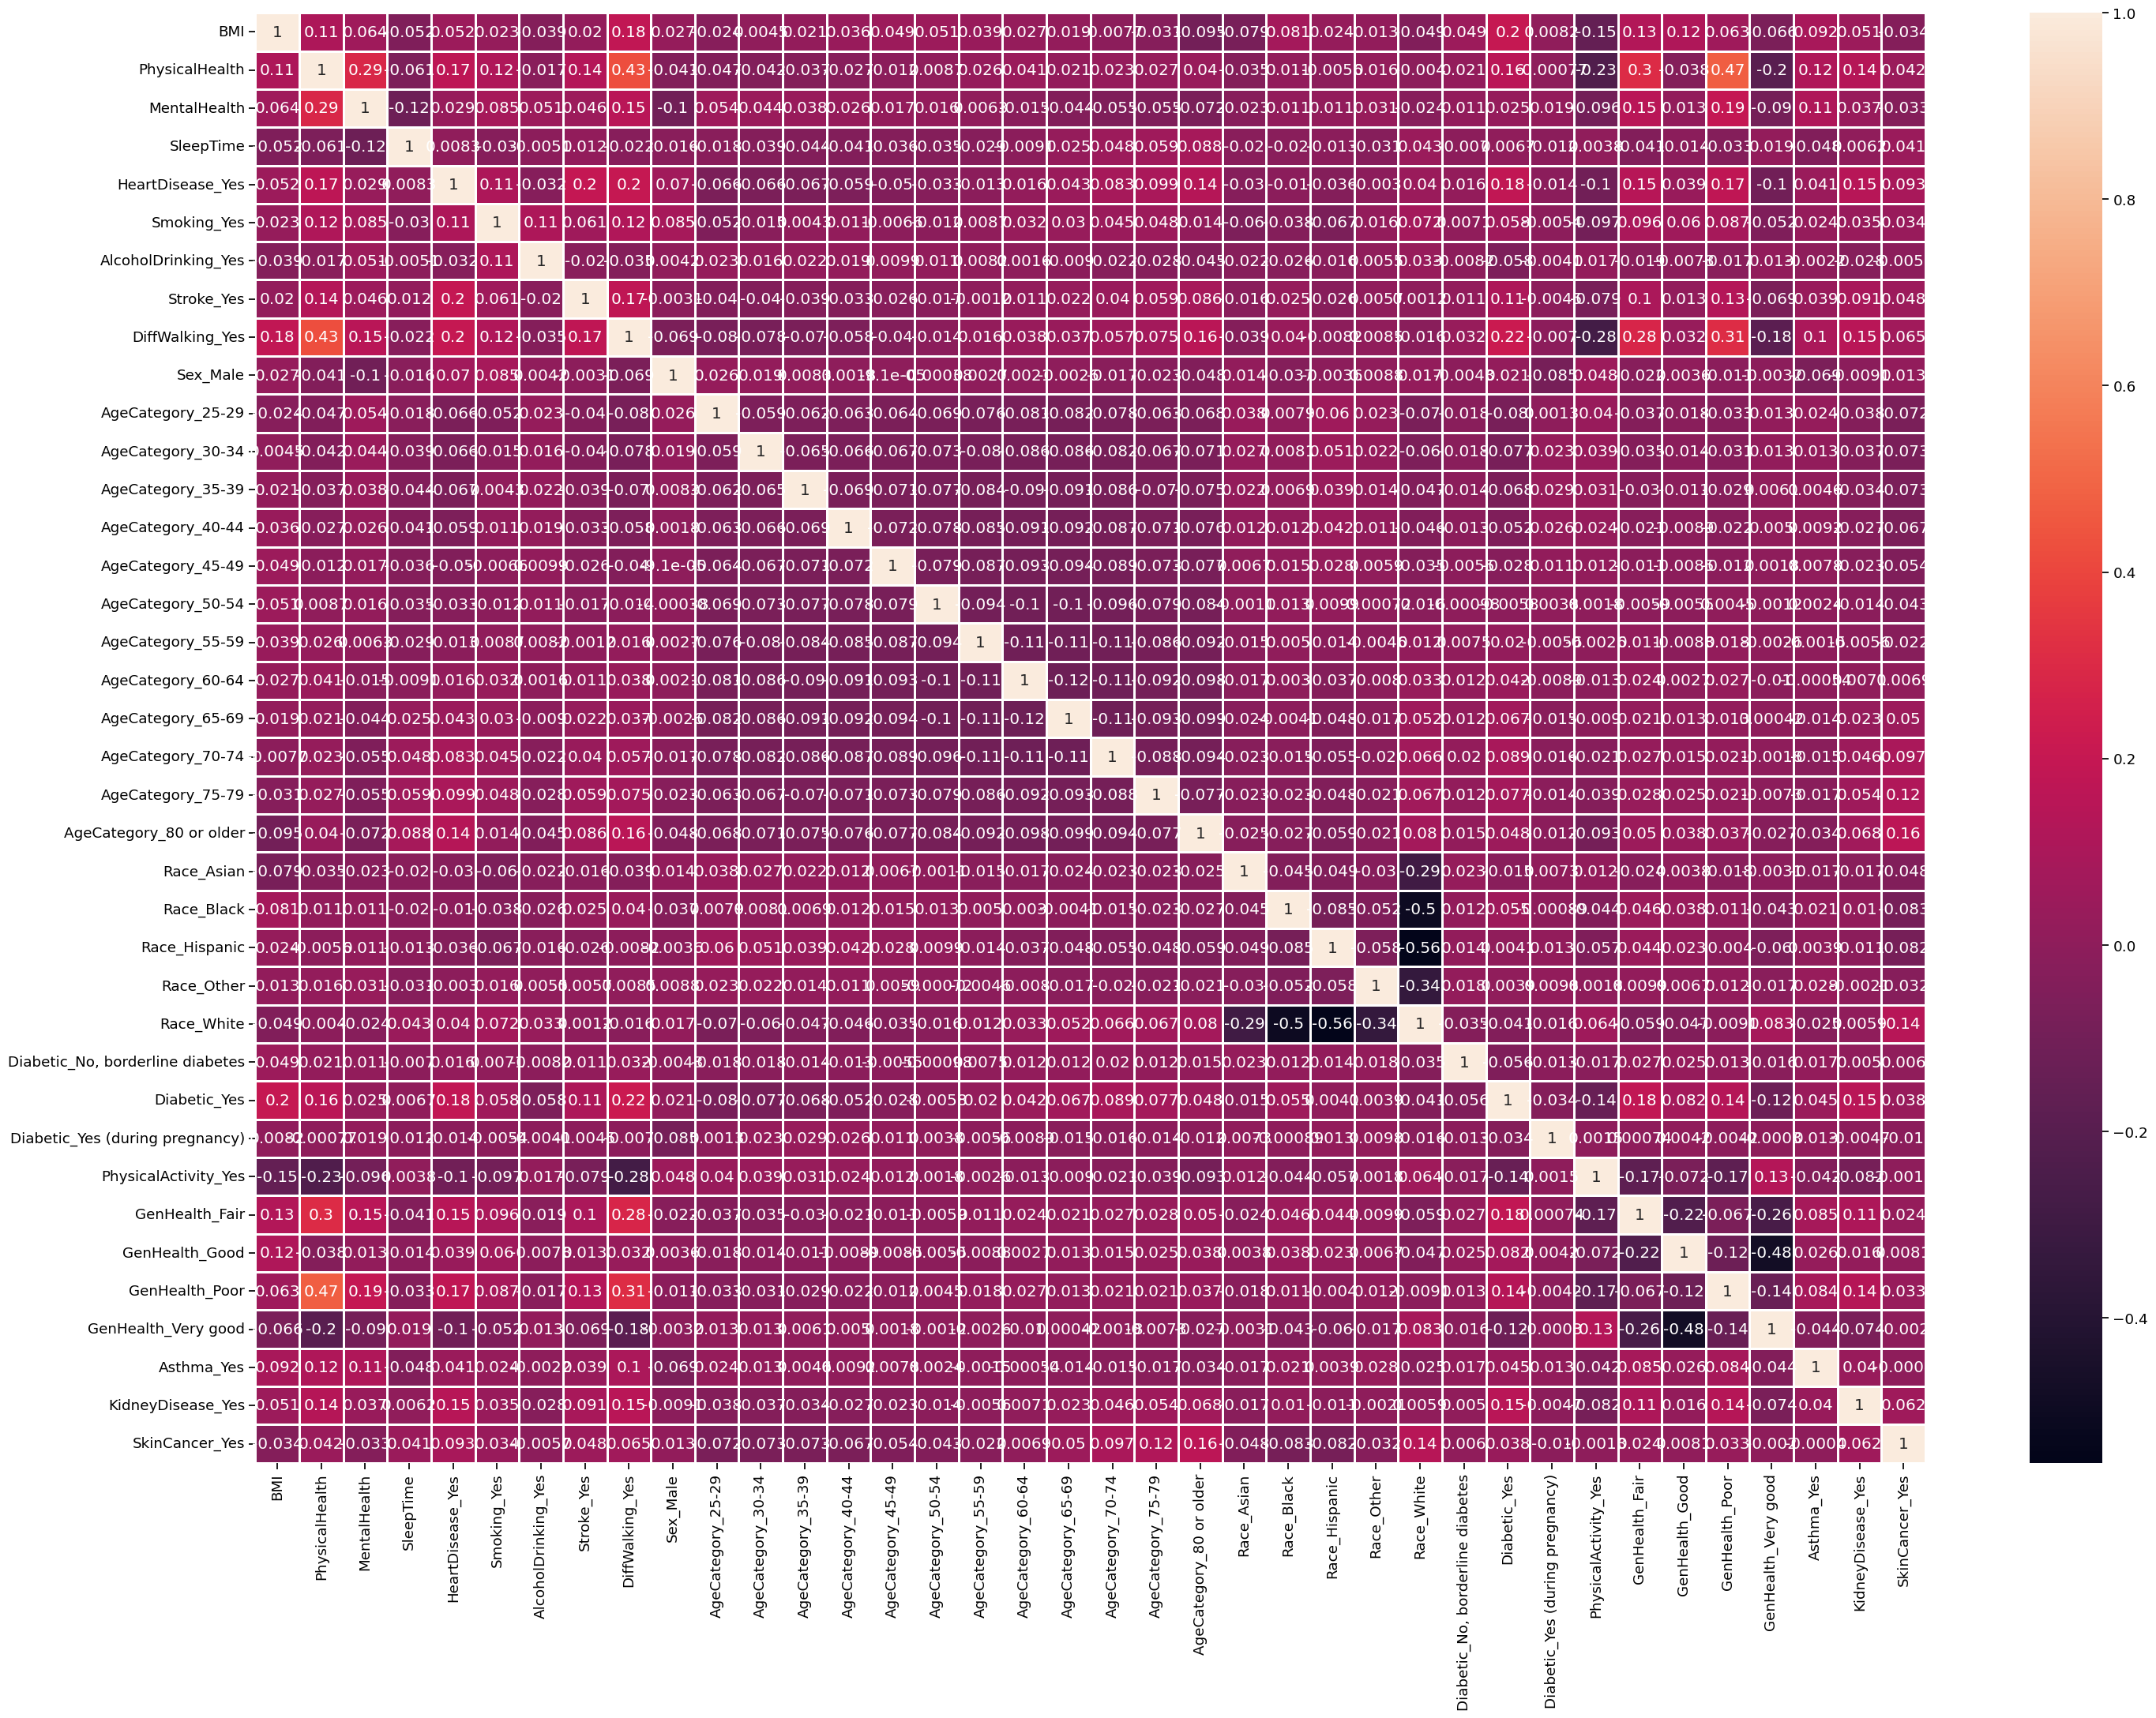

In [84]:
plt.figure(figsize=(30,22))
sns.set_context('notebook',font_scale = 1.2)
sns.heatmap(final_df.corr(),annot=True,linewidth =1)
plt.tight_layout()

In [85]:
final_df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
BMI,1.000000,0.109788,0.064131,-0.051822,0.051803,0.023118,-0.038816,0.019733,0.181678,0.026940,...,0.203494,0.008198,-0.150616,0.127364,0.118047,0.062501,-0.065954,0.092345,0.050768,-0.033644
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,0.170721,0.115352,-0.017254,0.137014,0.428373,-0.040904,...,0.158207,-0.000773,-0.232283,0.303773,-0.037663,0.471919,-0.196462,0.117907,0.142197,0.041700
MentalHealth,0.064131,0.287987,1.000000,-0.119717,0.028591,0.085157,0.051282,0.046467,0.152235,-0.100058,...,0.025480,0.018742,-0.095808,0.151321,0.013353,0.192079,-0.089956,0.114008,0.037281,-0.033412
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,0.008327,-0.030336,-0.005065,0.011900,-0.022216,-0.015704,...,0.006658,-0.011668,0.003849,-0.040923,-0.013725,-0.033074,0.019379,-0.048245,0.006238,0.041266
HeartDisease_Yes,0.051803,0.170721,0.028591,0.008327,1.000000,0.107764,-0.032080,0.196835,0.201258,0.070040,...,0.183072,-0.013930,-0.100030,0.147954,0.039033,0.174662,-0.101886,0.041444,0.145197,0.093317
Smoking_Yes,0.023118,0.115352,0.085157,-0.030336,0.107764,1.000000,0.111768,0.061226,0.120074,0.085052,...,0.058434,-0.005385,-0.097174,0.095620,0.059651,0.086520,-0.052305,0.024149,0.034920,0.033977
AlcoholDrinking_Yes,-0.038816,-0.017254,0.051282,-0.005065,-0.032080,0.111768,1.000000,-0.019858,-0.035328,0.004200,...,-0.058208,-0.004077,0.017487,-0.018859,-0.007808,-0.017068,0.013005,-0.002202,-0.028280,-0.005702
Stroke_Yes,0.019733,0.137014,0.046467,0.011900,0.196835,0.061226,-0.019858,1.000000,0.174143,-0.003091,...,0.108407,-0.004526,-0.079455,0.104983,0.013159,0.133641,-0.069395,0.038866,0.091167,0.048116
DiffWalking_Yes,0.181678,0.428373,0.152235,-0.022216,0.201258,0.120074,-0.035328,0.174143,1.000000,-0.068860,...,0.216605,-0.007040,-0.278524,0.282517,0.031570,0.308767,-0.184986,0.103222,0.153064,0.064840
Sex_Male,0.026940,-0.040904,-0.100058,-0.015704,0.070040,0.085052,0.004200,-0.003091,-0.068860,1.000000,...,0.020718,-0.085477,0.048247,-0.022456,0.003642,-0.010667,-0.003239,-0.069191,-0.009084,0.013434


<Axes: xlabel='BMI', ylabel='MentalHealth'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


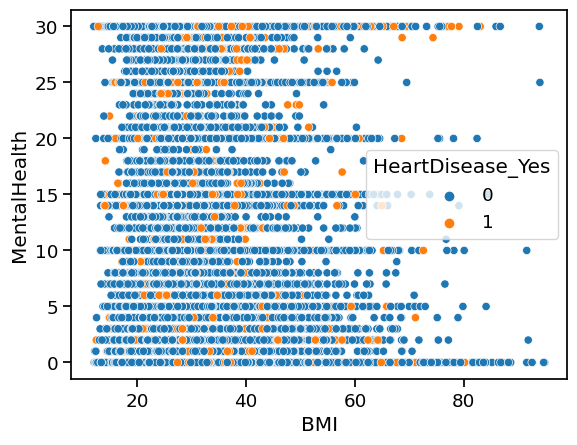

In [86]:
sns.scatterplot(x='BMI',y='MentalHealth',data=final_df, hue = 'HeartDisease_Yes')

In [87]:
x = final_df[['BMI', 'Smoking_Yes', 'Diabetic_Yes']]
y = final_df['HeartDisease_Yes']

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

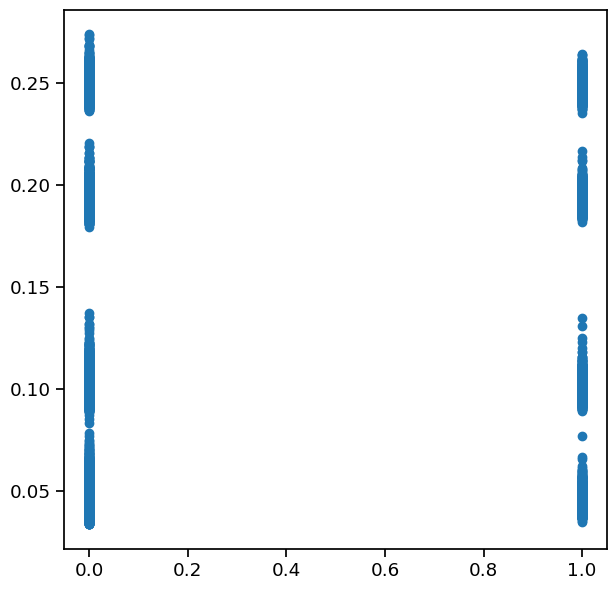

In [89]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,predictions)

<ipython-input-90-8c748beb4090>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='HeartDisease_Yes', ylabel='Density'>

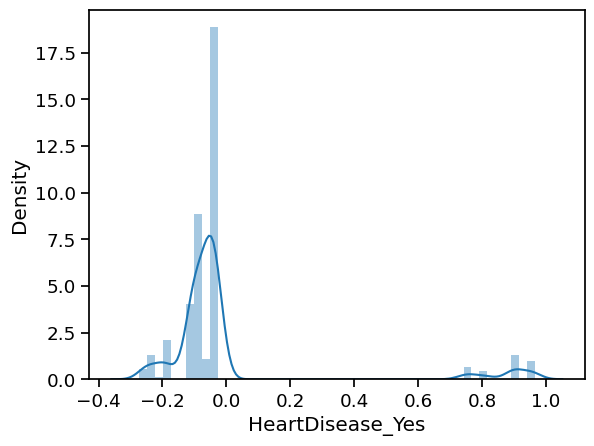

In [90]:
sns.distplot((y_test-predictions),bins=50)

In [91]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1503484610142935
MSE: 0.07532955019410043
RMSE 0.27446229284566653


<ipython-input-92-fe1e4bf797f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), hist_kws=dict(edgecolor="k", linewidth=2))


<Axes: xlabel='HeartDisease_Yes', ylabel='Density'>

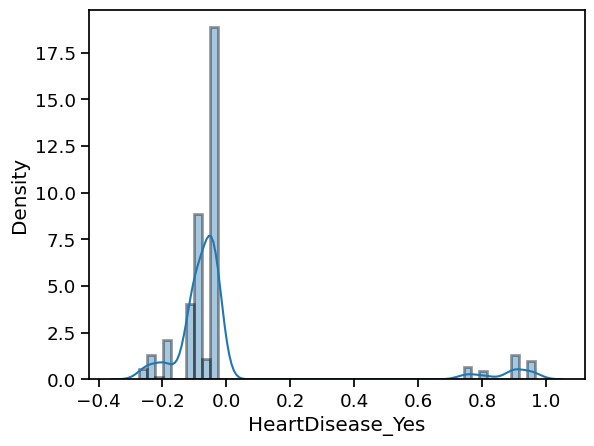

In [92]:
sns.distplot((y_test-predictions), hist_kws=dict(edgecolor="k", linewidth=2))

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [99]:
y_pred = knn_model.predict(scaled_X_test)

In [100]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [101]:
accuracy_score(y_test,y_pred)

0.8386221216025216

In [102]:
confusion_matrix(y_test,y_pred)

array([[66108,  6950],
       [ 5952,   939]])

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     73058
           1       0.12      0.14      0.13      6891

    accuracy                           0.84     79949
   macro avg       0.52      0.52      0.52     79949
weighted avg       0.85      0.84      0.84     79949

